In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pd.set_option('display.max_row',374)
pd.set_option('display.max_columns',13)

In [3]:
dt=pd.read_csv('hrt.csv')

In [4]:
dt.shape

(299, 13)

In [5]:
dt.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


## exploratory Data Analysis

#### objectif :
* comprendre du mieux possible nos données (un petit pas en avant vaut mieux qu'un grand pas en arriére)
* Développer une premier stratégie de modélisation

#### Analyse de forme :
* **variable target** : DEATH_EVENT
* **lignes et colonnes** :  299, 13
* **types de variables** : int64      10 (76.923077%) |float64     3 (23.076923%)
* **Analyse des valeurs manquantes**: il ya pas des valeurs manquantes (clean data)

In [6]:
df = dt.copy()

In [7]:
df.dtypes.value_counts()

int64      10
float64     3
dtype: int64

In [8]:
df.dtypes.value_counts(normalize=True)*100

int64      76.923077
float64    23.076923
dtype: float64

In [9]:
df.isna().sum()/df.shape[0]

age                         0.0
anaemia                     0.0
creatinine_phosphokinase    0.0
diabetes                    0.0
ejection_fraction           0.0
high_blood_pressure         0.0
platelets                   0.0
serum_creatinine            0.0
serum_sodium                0.0
sex                         0.0
smoking                     0.0
time                        0.0
DEATH_EVENT                 0.0
dtype: float64

### Analyse de Fond:
* **visualisation de la target** : 0    67.892977 | 1    32.10702
* **signification des variables** :
        * les variables continues ne sont pas sdandarisées
        * la seul variable qualitatives est: anaemia,diabetes,sex,smoking
* **Relation variables / target** :

In [10]:
df["DEATH_EVENT"].value_counts(normalize=True)*100

0    67.892977
1    32.107023
Name: DEATH_EVENT, dtype: float64

C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level functi

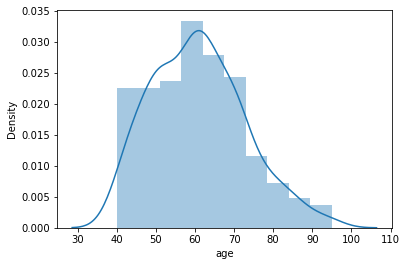

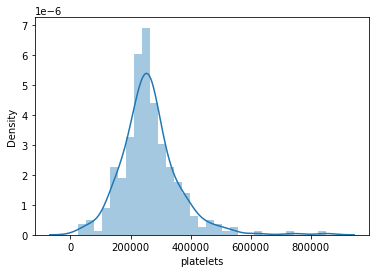

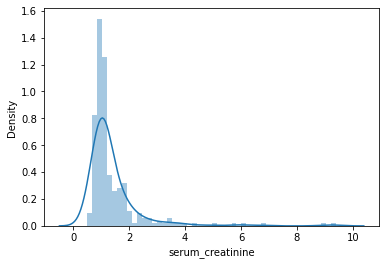

In [11]:
for col in df.select_dtypes('float'):
    plt.figure()
    sns.distplot(df[col])

In [12]:
for col in df.select_dtypes('int64'): 
     print(f"{col:-<10} {df[col].unique()}\n") 

anaemia--- [0 1]

creatinine_phosphokinase [ 582 7861  146  111  160   47  246  315  157  123   81  231  981  168
   80  379  149  125   52  128  220   63  148  112  122   60   70   23
  249  159   94  855 2656  235  124  571  127  588 1380  553  129  577
   91 3964   69  260  371   75  607  789  364 7702  318  109   68  250
  110  161  113 5882  224   92  102  203  336   76   55  280   78   84
  115   66  897  154  144  133  514   59  156   61  305  898 5209   53
  328  748 1876  936  292  369  143  754  400   96  737  358  200  248
  270 1808 1082  719  193 4540  646  281 1548  805  291  482  943  185
  132 1610 2261  233   30 1846  335   58  910   72  130 2334 2442  776
  196  835 3966  171  198   95 1419  478  176  395   99  145  104 1896
  151  244   62  121  418  167 1211 1767  308   97   64  101  212 2281
  972  131  135 1202  427 1021  118   86  675   57 2794   56  211  166
   93  707  119  232  720  180   90 1185 2017  624  207 2522  572  245
   88  446  191  326  655  258  29

C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level functi

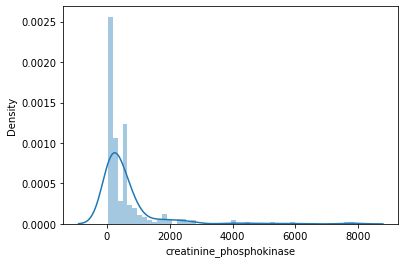

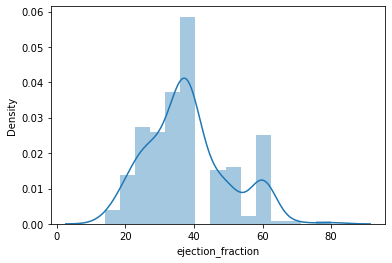

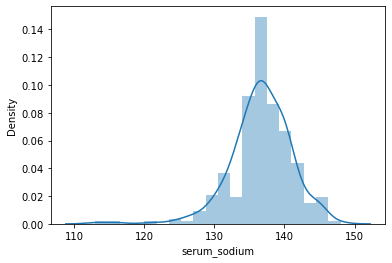

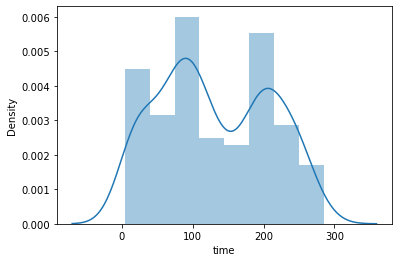

In [14]:
for col in ["creatinine_phosphokinase","ejection_fraction","serum_sodium","time"]:
    plt.figure()
    sns.distplot(df[col])

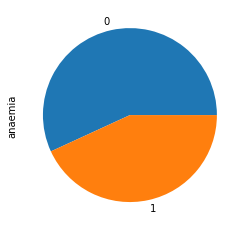

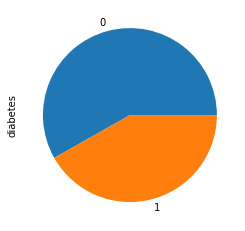

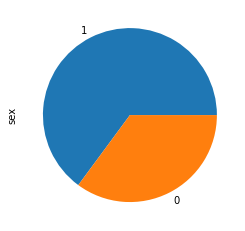

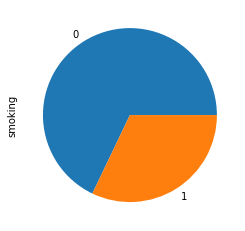

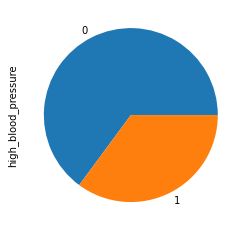

In [19]:
for col in ["anaemia","diabetes","sex","smoking","high_blood_pressure"]:
    plt.figure()
    df[col].value_counts().plot.pie()

In [16]:
df_1 = df[df["DEATH_EVENT"]  == 1]
df_0 = df[df["DEATH_EVENT"]  == 0]

C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level functi

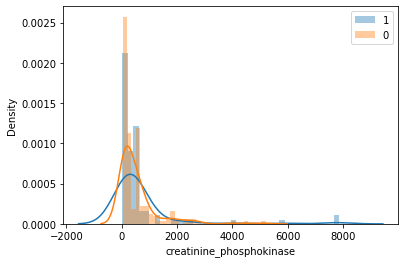

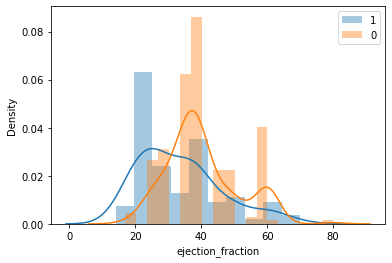

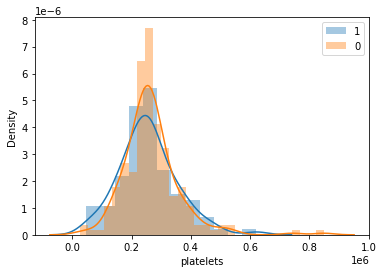

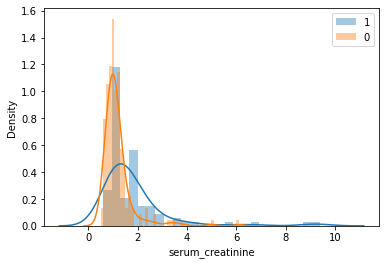

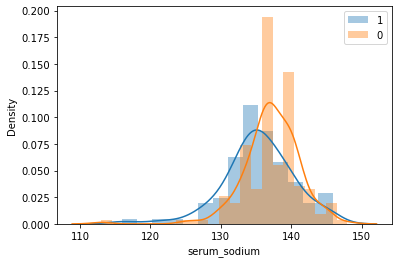

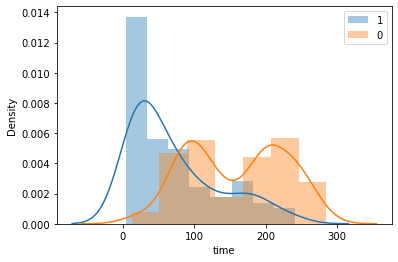

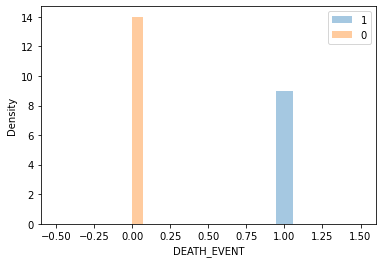

In [20]:
for col in df.drop(columns=["anaemia","diabetes","sex","smoking","age","high_blood_pressure"]).columns:
    plt.figure()
    sns.distplot(df_1[col],label='1')
    sns.distplot(df_0[col],label='0')
    plt.legend()

<AxesSubplot:xlabel='age', ylabel='count'>

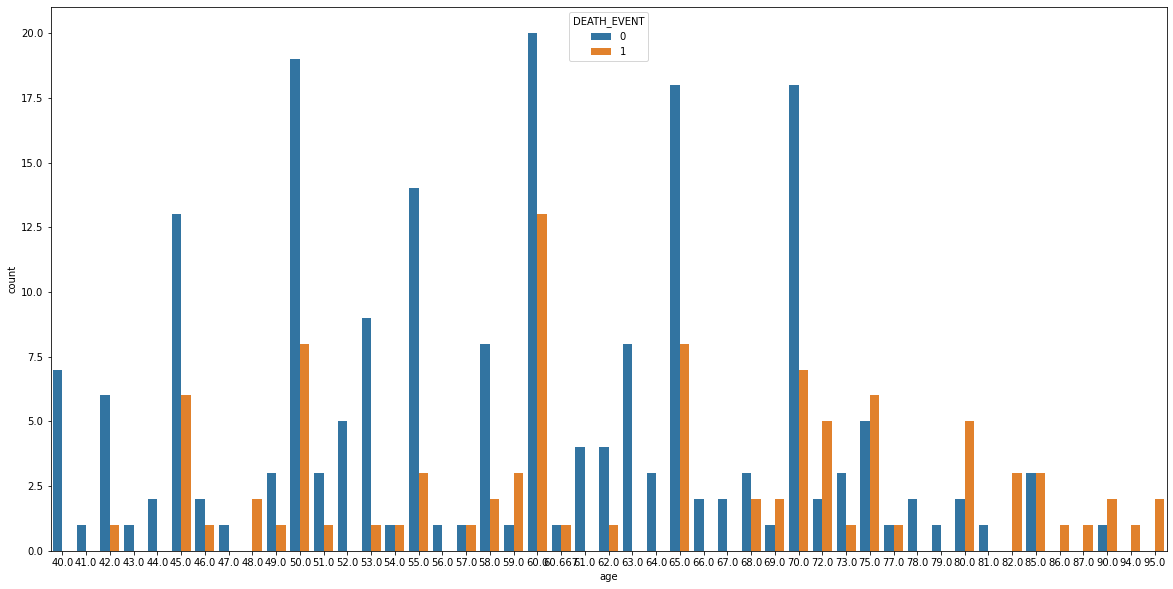

In [22]:
plt.figure(figsize=(20,10))
sns.countplot(x ="age" , hue ="DEATH_EVENT", data=df)

In [24]:
df.corr()["DEATH_EVENT"]

age                         0.253729
anaemia                     0.066270
creatinine_phosphokinase    0.062728
diabetes                   -0.001943
ejection_fraction          -0.268603
high_blood_pressure         0.079351
platelets                  -0.049139
serum_creatinine            0.294278
serum_sodium               -0.195204
sex                        -0.004316
smoking                    -0.012623
time                       -0.526964
DEATH_EVENT                 1.000000
Name: DEATH_EVENT, dtype: float64

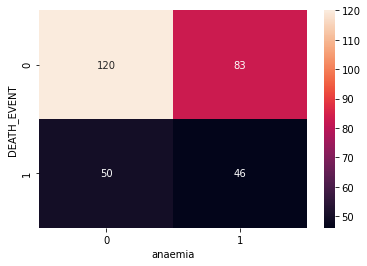

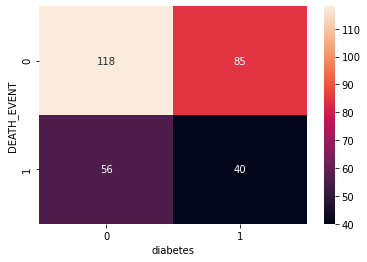

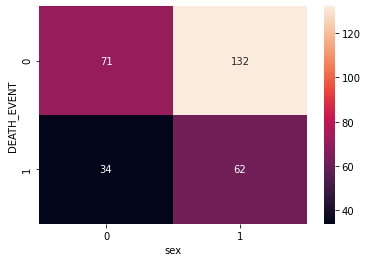

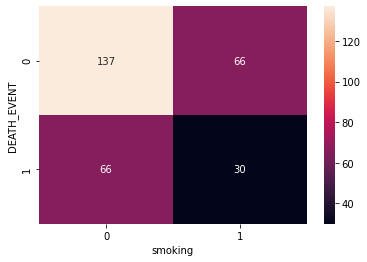

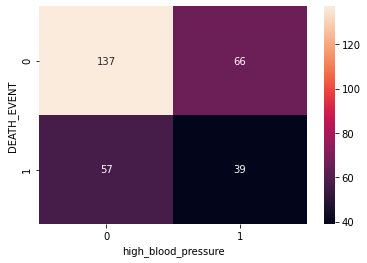

In [26]:
for col in ["anaemia","diabetes","sex","smoking","high_blood_pressure"]:
    plt.figure()
    sns.heatmap(pd.crosstab(df["DEATH_EVENT"],df[col]), annot=True,fmt='d')

In [27]:
from sklearn.model_selection import train_test_split

In [28]:
trainset , testset = train_test_split(df,test_size=0.2,random_state=0)

In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, confusion_matrix, classification_report
from sklearn.model_selection import learning_curve
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

In [33]:
def preprocessing(df):
    x = df.drop('DEATH_EVENT', axis=1)
    y = df["DEATH_EVENT"]
    
    print(y.value_counts())
    
    return x,y
def evaluation(model):
    model.fit(x_train,y_train)
    ypred = model.predict(x_test)
    
    print(confusion_matrix(y_test, ypred))
    print(classification_report(y_test, ypred))
    print(model.score(x_test,y_test)) 

In [31]:
lr = LogisticRegression()
knn = KNeighborsClassifier()
sgd =SGDClassifier()
tree = DecisionTreeClassifier()
moduls = {"lr":lr,"knn":knn,"sgd":sgd,"tree":tree}

In [34]:
x_train,y_train = preprocessing(trainset)
x_test , y_test = preprocessing(testset)

0    166
1     73
Name: DEATH_EVENT, dtype: int64
0    37
1    23
Name: DEATH_EVENT, dtype: int64


In [35]:
for model in moduls:
    print(model)
    evaluation(moduls[model])

lr
[[35  2]
 [14  9]]
              precision    recall  f1-score   support

           0       0.71      0.95      0.81        37
           1       0.82      0.39      0.53        23

    accuracy                           0.73        60
   macro avg       0.77      0.67      0.67        60
weighted avg       0.75      0.73      0.70        60

0.7333333333333333
knn
[[25 12]
 [19  4]]
              precision    recall  f1-score   support

           0       0.57      0.68      0.62        37
           1       0.25      0.17      0.21        23

    accuracy                           0.48        60
   macro avg       0.41      0.42      0.41        60
weighted avg       0.45      0.48      0.46        60

0.48333333333333334
sgd
[[37  0]
 [23  0]]
              precision    recall  f1-score   support

           0       0.62      1.00      0.76        37
           1       0.00      0.00      0.00        23

    accuracy                           0.62        60
   macro avg       0.

C:\Users\hp\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [36]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

In [37]:
knn = make_pipeline(StandardScaler(),KNeighborsClassifier(3))
sgd = make_pipeline(StandardScaler(),SGDClassifier())
rl = make_pipeline(StandardScaler(),LogisticRegression())
moduls = {"lr":lr,"knn":knn,"sgd":sgd}

In [38]:
from sklearn.model_selection import cross_val_score,StratifiedKFold
from sklearn.model_selection import GridSearchCV

In [39]:
cv=StratifiedKFold(4,shuffle=True)

In [40]:
def evaluation(model):
    model.fit(x_train,y_train)
    ypred = model.predict(x_test)
    
    print(confusion_matrix(y_test, ypred))
    print(classification_report(y_test, ypred))
    print(model.score(x_test,y_test))
    n, train_score, val_score = learning_curve(model, x_train, y_train, cv=cv, train_sizes=np.linspace(0.1,1,10))
    
    
    plt.figure(figsize=(12,8))
    plt.plot(n, train_score.mean(axis=1), label = 'train')
    plt.plot(n, val_score.mean(axis=1), label = 'validation')
    plt.legend()

lr
[[35  2]
 [14  9]]
              precision    recall  f1-score   support

           0       0.71      0.95      0.81        37
           1       0.82      0.39      0.53        23

    accuracy                           0.73        60
   macro avg       0.77      0.67      0.67        60
weighted avg       0.75      0.73      0.70        60

0.7333333333333333


C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

knn
[[33  4]
 [16  7]]
              precision    recall  f1-score   support

           0       0.67      0.89      0.77        37
           1       0.64      0.30      0.41        23

    accuracy                           0.67        60
   macro avg       0.65      0.60      0.59        60
weighted avg       0.66      0.67      0.63        60

0.6666666666666666
sgd
[[35  2]
 [15  8]]
              precision    recall  f1-score   support

           0       0.70      0.95      0.80        37
           1       0.80      0.35      0.48        23

    accuracy                           0.72        60
   macro avg       0.75      0.65      0.64        60
weighted avg       0.74      0.72      0.68        60

0.7166666666666667


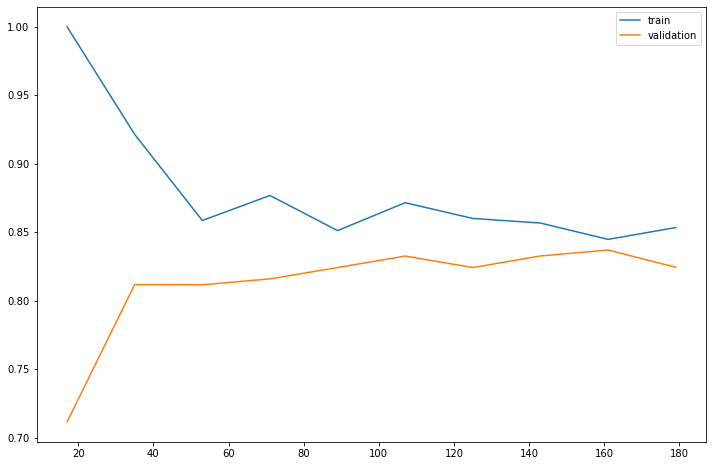

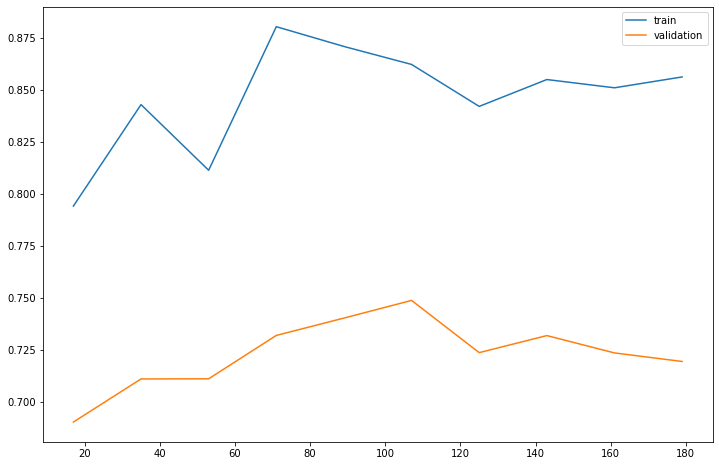

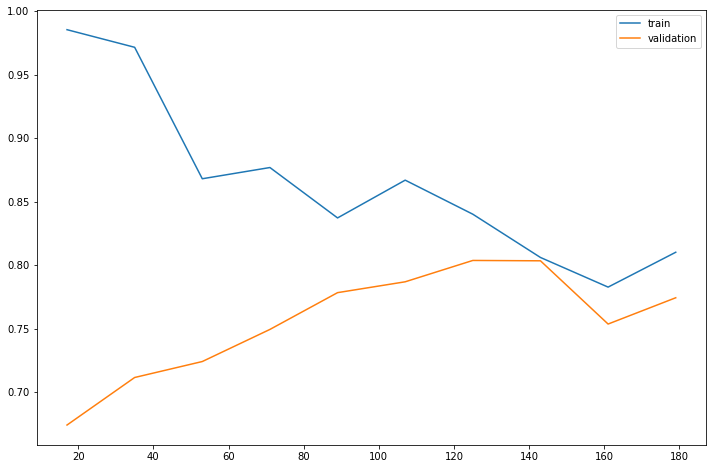

In [41]:
for model in moduls:
    print(model)
    evaluation(moduls[model])

In [45]:
para={"kneighborsclassifier__n_neighbors":np.arange(1,12),
     "kneighborsclassifier__metric":['euclidean','manhattan','chebyshev',"minkowski"]}

In [46]:
grid = GridSearchCV(knn,param_grid=para,cv=cv)
grid.fit(x_train,y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=4, random_state=None, shuffle=True),
             estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('kneighborsclassifier',
                                        KNeighborsClassifier(n_neighbors=3))]),
             param_grid={'kneighborsclassifier__metric': ['euclidean',
                                                          'manhattan',
                                                          'chebyshev',
                                                          'minkowski'],
                         'kneighborsclassifier__n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])})

In [47]:
grid.best_score_

0.7654661016949152

In [48]:
grid.best_params_

{'kneighborsclassifier__metric': 'euclidean',
 'kneighborsclassifier__n_neighbors': 5}

In [49]:
knn_1=grid.best_estimator_

[[35  2]
 [15  8]]
              precision    recall  f1-score   support

           0       0.70      0.95      0.80        37
           1       0.80      0.35      0.48        23

    accuracy                           0.72        60
   macro avg       0.75      0.65      0.64        60
weighted avg       0.74      0.72      0.68        60

0.7166666666666667


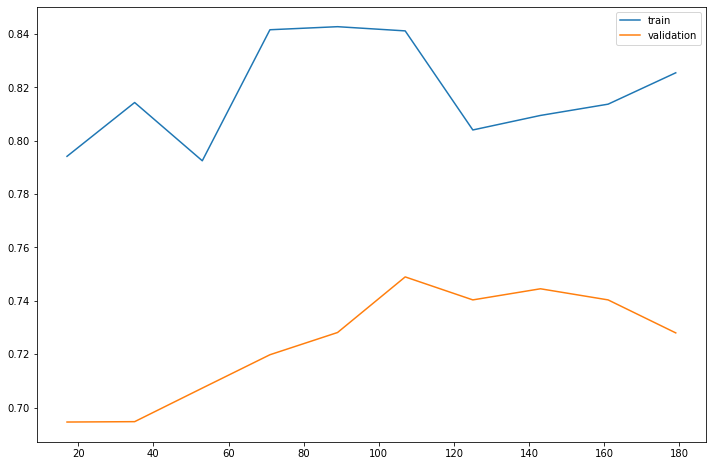

In [50]:
evaluation(knn_1)